<IPython.core.display.Javascript object>


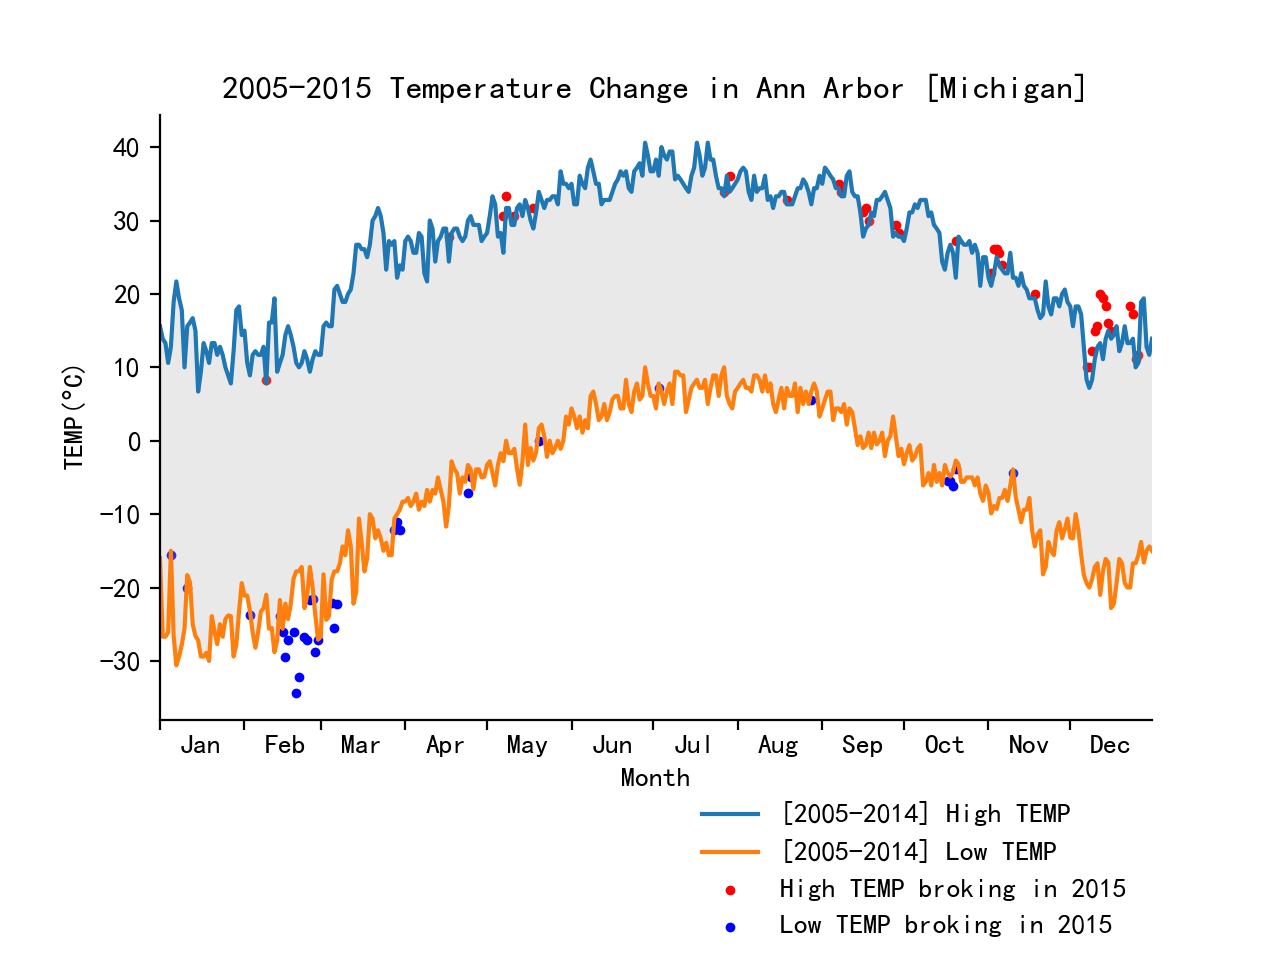

In [261]:
import matplotlib.pyplot as plt
#import mplleaflet
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import datetime
import matplotlib.ticker as ticker

def plot_temperature(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinnedCsvs_d{}/{}.csv'.format(binsize, hashid))
    df['Data_Value'] = df['Data_Value']/10

    data_1 = df.where(df['Date'] >= '2005-01-01').where(df['Date'] <= '2014-12-31').dropna()
    data_2 = df.where(df['Date'] >= '2015-01-01').where(df['Date'] <= '2015-12-31').dropna()
    
    data_1 = data_1[data_1['Date'].str[5:] != '02-29']
    data_2 = data_2[data_2['Date'].str[5:] != '02-29']
    
    data_1['Month'] = data_1['Date'].str[5:]
    data_2['Month'] = data_2['Date'].str[5:]
    
    max_temp = data_1[data_1['Element'] == 'TMAX'].groupby(['Month']).agg({"Data_Value": np.max})
    max_temp = max_temp.sort_values(by = 'Month')
    min_temp = data_1[data_1['Element'] == 'TMIN'].groupby(['Month']).agg({'Data_Value': np.min})
    min_temp = min_temp.sort_values(by = 'Month')
    
    date_x = np.arange(np.datetime64('2014-01-01'), np.datetime64('2015-01-01'), dtype='datetime64[D]')

    t_max_y = max_temp['Data_Value']
    t_min_y = min_temp['Data_Value']
    
    st_max_temp = data_2[data_2['Element'] == 'TMAX'].groupby(['Month']).agg({'Data_Value': np.max})
    st_min_temp = data_2[data_2['Element'] == 'TMIN'].groupby(['Month']).agg({'Data_Value': np.min})
    
    plt.figure()
    plots = plt.plot(date_x, t_max_y,  date_x, t_min_y)
    plt.xlabel('Month')
    plt.ylabel('TEMP($\degree$C)')
    plt.title('2005-2015 Temperature Change in Ann Arbor [Michigan]')

    new_max_temp = [ st_max_temp.loc[item]['Data_Value'] if max_temp.loc[item]['Data_Value'] < st_max_temp.loc[item]['Data_Value'] else None for item in max_temp.index ]
    new_min_temp = [ st_min_temp.loc[item]['Data_Value'] if min_temp.loc[item]['Data_Value'] > st_min_temp.loc[item]['Data_Value'] else None for item in min_temp.index ]

    plt.scatter(date_x, new_max_temp, s = 25, c = 'red', label = '2015 Max Temperature', marker = '.')
    plt.scatter(date_x, new_min_temp, s = 25, c = 'blue', label = '2015 Min Temperature', marker = '.')
    plt.gca().fill_between(date_x, t_max_y, t_min_y, facecolor = 'darkgrey', alpha = 0.25)
    
    plt.legend(loc=4, bbox_to_anchor = (1,-0.4), frameon=False, 
               labels = ['[2005-2014] High TEMP', '[2005-2014] Low TEMP', 'High TEMP broking in 2015', 'Low TEMP broking in 2015'])
    
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.subplots_adjust(bottom = 0.25)

    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=16))
    plt.gca().xaxis.set_major_formatter(ticker.NullFormatter())
    plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
    
    plt.xlim(date_x[0],date_x[-1])

    for tick in plt.gca().xaxis.get_minor_ticks():
        tick.tick1line.set_markersize(0)
        tick.tick2line.set_markersize(0)
        tick.label1.set_horizontalalignment('center')


plot_temperature(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')
